In [3]:
#Importing the essencial libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Loading the dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


#### Exploring the dataset

In [5]:
# Return the no. of rows and columns
df.shape

(2000, 9)

In [6]:
# Returns the basic Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [11]:
# Return the statistical information on numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [9]:
#Returns an object with all the column headers
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
#Return differnt datatypes for each columns
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [13]:
# Returns True for the columns having null values, else false
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [14]:
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


Text(0, 0.5, 'Count')

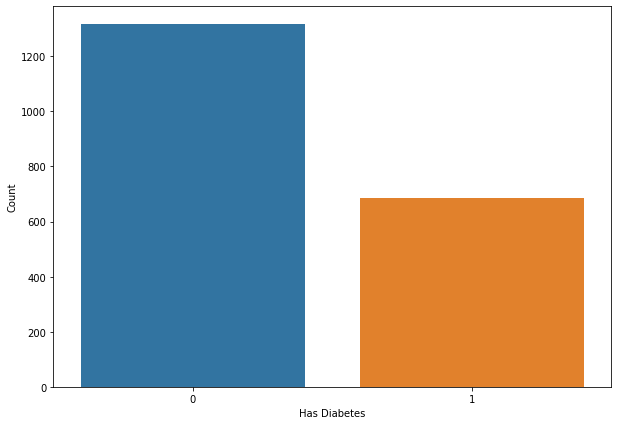

In [16]:
# Plotting the outcomes based on the number of dataset entries
plt.figure(figsize=(10,7))
sns.countplot(x='Outcome', data=df)
plt.xlabel('Has Diabetes')
plt.ylabel('Count')

### Data Cleaning

In [18]:
#Replacing the 0 values by 'NAN values'
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies        0
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

In [23]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138.0,62.0,35.0,NaN,33.6,0.127,47,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
2,0,145.0,NaN,NaN,NaN,44.2,0.630,31,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0


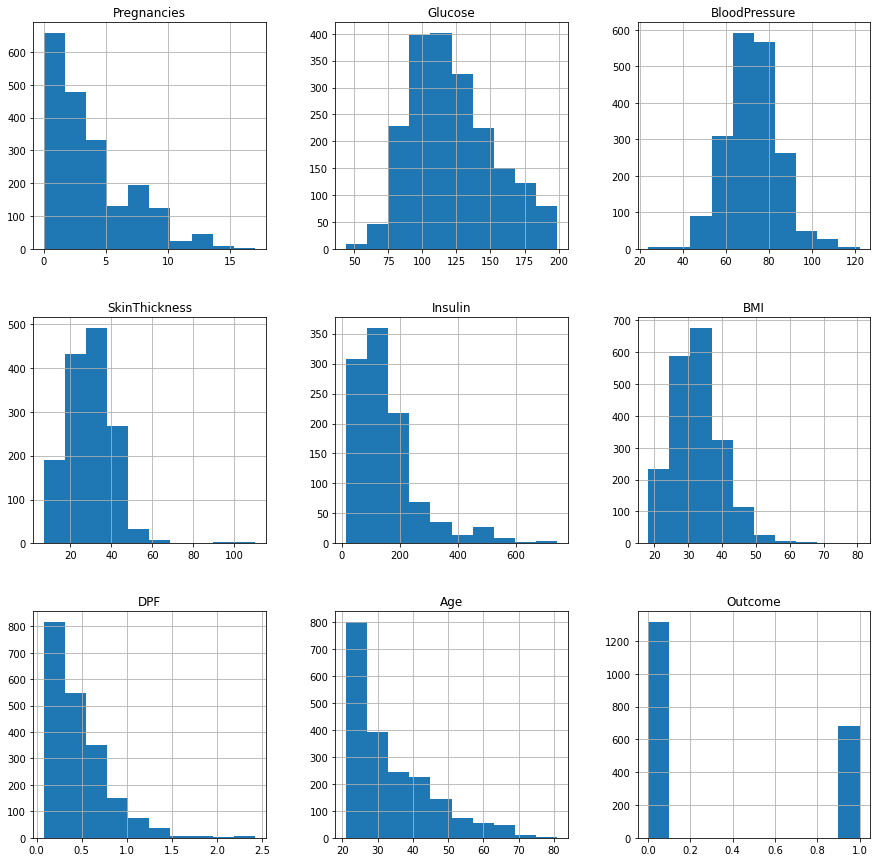

In [24]:
# To fill these NAN values we need to understand the data distribution
#Plotting histograms of the dataset before replacing the NAN values
p = df_copy.hist(figsize=(15,15))

In [26]:
#Replacing the NAN values by mean,median depending upon distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(),inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(),inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(),inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(),inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(),inplace=True)

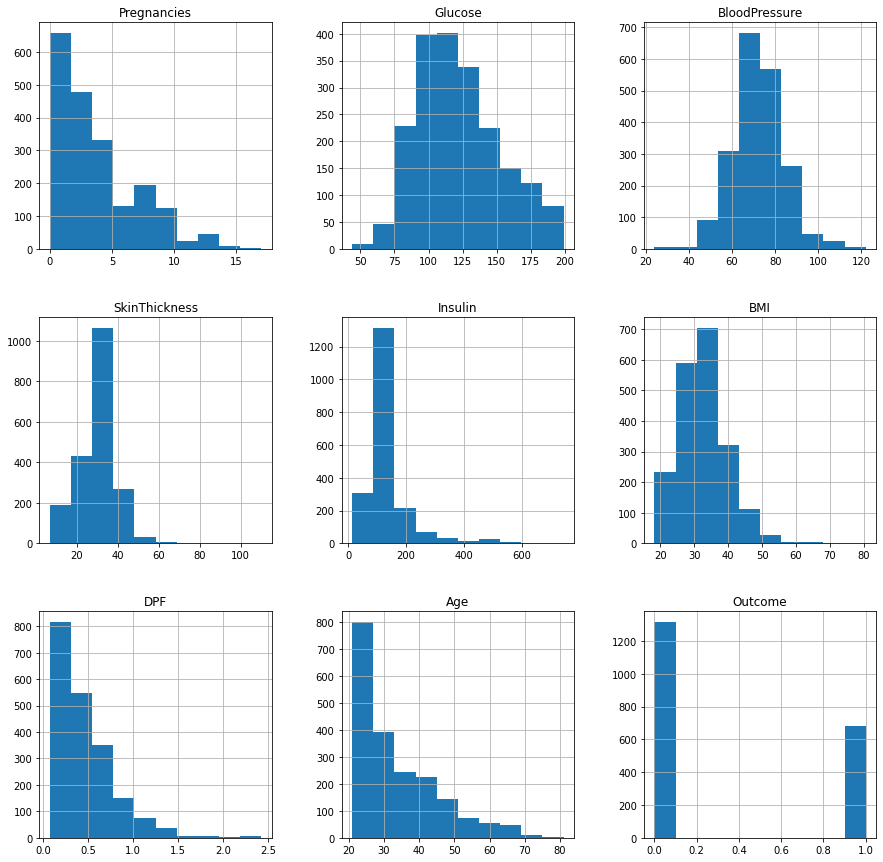

In [27]:
#PLotting the histograms of datset after replacing the NAN values
p = df_copy.hist(figsize=(15,15))

In [28]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [33]:
### Model Building
from sklearn.model_selection import train_test_split

X =df.drop(columns='Outcome')
y = df['Outcome']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape,X_test.shape))

X_train size: (1600, 8), X_test size: (400, 8)


In [34]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
#Using GridsearchCv to find the best algorithm for this problem

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [45]:
# Creating the function to calculate best model for this problem
def find_best_model(X,y):
    models = {
        'logistic_regression':{
            'model': LogisticRegression(solver='lbfgs',multi_class='auto'),
            'parameters':{
                'C':[1,5,10]
            }
        },
        'decision_tree':{
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters':{
                'criterion':['gini','entropy'],
                'max_depth':[5,10]
            }
        },
        'random_forest': {
            'model' :RandomForestClassifier(criterion='gini'),
            'parameters':{
                'criterion':['gini','entropy'],
                'max_depth' :[5,10]
            }
        },
        'svm':{
            'model':SVC(gamma='auto'),
            'parameters' : {
                'C':[1,10,20],
                'kernel':['rbf','linear']
            }
        }
    }
    
    scores = []
    cv_shuffle = ShuffleSplit(n_splits=5,test_size=0.20,random_state=0)
    
    for model_name,model_params in models.items():
        gs = GridSearchCV(model_params['model'],model_params['parameters'],cv=cv_shuffle,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':model_name,
            'best_parameters' : gs.best_params_,
            'score': gs.best_score_
        })
    return pd.DataFrame(scores,columns=['model','best_parameters','score'])

find_best_model(X_train,y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 10},0.763125
1,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.896875
2,random_forest,"{'criterion': 'entropy', 'max_depth': 10}",0.943125
3,svm,"{'C': 20, 'kernel': 'rbf'}",0.869375


##### NOTE: Since the RandomForest algorithms has the highest accuracy,we will further tune the model using hyparameter optimaztion

In [47]:
# Using the cross_val_Score for gaining the average accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=20,random_state=0),X_train,y_train,cv=5)
print('Average Accuracy: {}%'.format(round(sum(scores)*100/len(scores)),3))

Average Accuracy: 95%


In [48]:
# Creating Random Forest Model
classifier = RandomForestClassifier(n_estimators=20,random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [49]:
classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

#### Model_Evaluation

In [52]:
# Creating the confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[272,   0],
       [  5, 123]], dtype=int64)

Text(69.0, 0.5, 'Actual values')

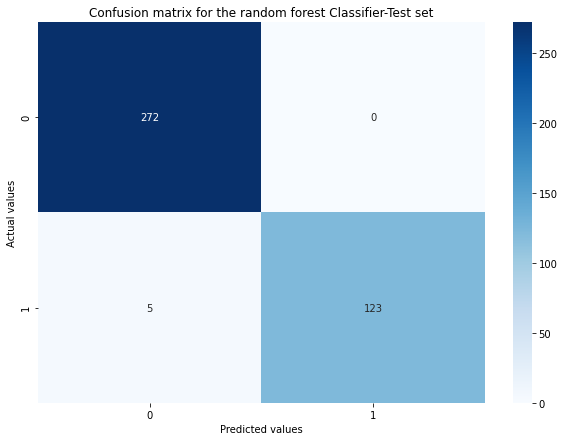

In [53]:
# Plotiing the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')
plt.title('Confusion matrix for the random forest Classifier-Test set')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [54]:
# Accuracy score
score = round(accuracy_score(y_test,y_pred),4)*100
print('Accuracy on test set:{}%'.format(score))

Accuracy on test set:98.75%


In [55]:
# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       272
           1       1.00      0.96      0.98       128

    accuracy                           0.99       400
   macro avg       0.99      0.98      0.99       400
weighted avg       0.99      0.99      0.99       400



In [56]:
# Creating the confusion matrix for the training set
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train,y_train_pred)
cm

array([[1044,    0],
       [   1,  555]], dtype=int64)

Text(69.0, 0.5, 'Predicted Values')

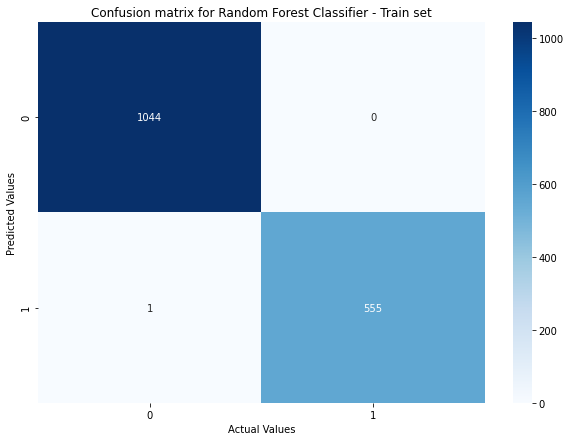

In [57]:
#Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm,annot=True,cmap="Blues",fmt='g')
plt.title('Confusion matrix for Random Forest Classifier - Train set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [58]:
# Accuracy score
score = round(accuracy_score(y_train,y_train_pred),4)*100
print("Accuracy on training set: {}%".format(score))

Accuracy on training set: 99.94%


In [59]:
# Classification Report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1044
           1       1.00      1.00      1.00       556

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



### Predictions

In [66]:
# Creating function for prediction
def predict_diabetes(Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)
    
    x = [[preg,glucose,bp,st,insulin,bmi,dpf,age]]
    x = sc.transform(x)
    
    return classifier.predict(x)

In [67]:
# Prediction1 
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age

prediction = predict_diabetes(2, 81, 72, 15, 76,30.1, 0.547, 25)[0]
if prediction:
    print("Oops! You have diabetes")
else:
    print("Great! You don't have diabetes")

Great! You don't have diabetes


In [68]:
# Prediction2
## Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(1,117,88,24,145,34.5,0.403,40)[0]
if prediction:
    print("Oops! You have diabetes")
else:
    print("Great! You don't have diabetes")

Oops! You have diabetes


In [69]:
# Prediction 3
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(5, 120, 92, 10, 81, 26.1, 0.551, 67)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.
